In [ ]:
# Annotated follow-along guide: EDA using basic data functions with Python

This notebook contains the code used in the following instructional video: [EDA using basic data functions with Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/4k4Vg/eda-using-basic-data-functions-with-python).

## Introduction

Throughout this notebook, we will implement discovering skills on a dataset. Before getting started, watch the associated instructional video and complete the in-video question. All of the code we will be implementing and related instructions are contained in this notebook.

## Overview

In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.

## Import packages and libraries

Before getting started, we will need to import all the required libraries and extensions. Throughout the course, we will be using pandas, numpy, and datetime for operations, and matplotlib, pyplot, and seaborn for plotting.

In [1]:
import pandas as pd
import numpy as np
import datetime as dp
import matplotlib.pyplot as plt

In [2]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv',parse_dates=[0])

In [3]:
# Inspect the first 10 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [4]:
df.describe()

,number_of_strikes
count,3.401012e+06
mean,1.311403e+01
std,3.212099e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,2.211000e+03


In [4]:
df.head(3)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)


In [5]:
df.sample()

,date,number_of_strikes,center_point_geom
2587348,2018-06-07,7,POINT(-98.7 20.9)


In [6]:
df.size

10203036

In [7]:
df.shape

(3401012, 3)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['month_name']= df['date'].dt.month_name().str.slice(stop=3)

In [6]:
df['month'] = df['date'].dt.month

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   month_name         object        
 4   month              int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 129.7+ MB


Notice that the data is structured as one row per day along with the geometric location of the strike. 

A quick way to determine how many rows and columns of data there are in total is to use `df.shape`. The information will be output as: ([rows], [columns]).

In [14]:
df.shape

(3401012, 5)

In [8]:
df.columns

Index(['date', 'number_of_strikes', 'center_point_geom', 'month_name',
       'month'],
      dtype='object')

In [16]:
df.index

RangeIndex(start=0, stop=3401012, step=1)

The total number of rows is 3,401,012, and there are three columns. 

### Convert the date column to datetime

`info` will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory. 

In this case, notice that the `date` column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function `to_datetime()`.

### Calculate the days with the most strikes

As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the `groupby()`, `sum()`, and `sort_values()` functions from pandas.

When using `groupby()` on the date column, the function combines all rows with the same date into a single row. 

Then, using `sum()` performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the `center_point_geom` column is not included in the output. That's because, as a string object, this column is not summable. 

Finally, `sort_values()` returns the results in descending order of total strikes for each day in the data.

In [15]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(30) 

,number_of_strikes,month
date,,
2018-08-29,1070457,222016
2018-08-17,969774,231264
2018-08-28,917199,188136
2018-08-27,824589,196128
2018-08-30,802170,166640
2018-08-19,786225,199416
2018-08-18,741180,195976
2018-08-16,734475,211080
2018-08-31,723624,187664


A common mistake among data professionals is using `count()` instead of `sum()`, and vice versa. In this case, `count()` would return the number of occurrences of each date in the dataset, which is not the desired result.

### Extract the month data

Next, we will extract the month data from the `date` column and add that extracted month data into a new column called `month`. `dt.month` extracts just the month information (as a numeric value) from the date. This is why converting the `date` column to datetime is very useful. 

### Calculate the number of strikes per month

Now, we will sort our values by most strikes per month. Use `groupby()`, `sum()` and `sort_values()` from pandas again.

In [19]:
# Calculate total number of strikes per month
df.groupby(['month_name']).sum().sort_values('month_name', ascending=True).head(12)

,number_of_strikes,month
month_name,,
Apr,1524339,615144
Aug,15525255,5740240
Dec,312097,670284
Feb,2071315,133616
Jan,860045,58410
Jul,8320400,4981879
Jun,6445083,2935290
Mar,854168,312618
May,4166726,2099695


### Convert the month number to text 

To help read the data more easily, let's convert the month number to text using the datetime function `dt.month_name()` and add this as a new column in the dataframe. `str.slice` will omit the text after the first three letters. 

### Create a new dataframe

The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, we will create a new dataframe called `df_by_month`. This will allow us to easily access the month, month text, and total number of strikes for each month. 

In [17]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month_name']).sum().sort_values('month_name', ascending=True).head(12).reset_index()
df_by_month

,month_name,number_of_strikes,month
0,Apr,1524339,615144
1,Aug,15525255,5740240
2,Dec,312097,670284
3,Feb,2071315,133616
4,Jan,860045,58410
5,Jul,8320400,4981879
6,Jun,6445083,2935290
7,Mar,854168,312618
8,May,4166726,2099695
9,Nov,409263,798644


### Make a bar chart

Now, let's make a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

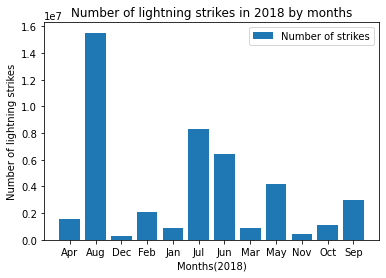

In [18]:
plt.bar(x=df_by_month['month_name'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

## Conclusion

If you have successfully completed the material above, congratulations! You now have some of the fundamental elements of data discovery that you can apply to your own datasets. 